In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
import gc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:

TRAIN_PATH = 'train.csv'
TEST_PATH = 'test.csv'


df = pd.read_csv(TRAIN_PATH)
X_final = pd.read_csv(TEST_PATH)

In [3]:

X = df.drop('Survived', axis=1)
y = df[['Survived']]
X.set_index('PassengerId', inplace=True)
X_final.set_index('PassengerId', inplace=True)

print('Строк в трейне:' ,  X.shape[0])
print('Строк в тесте', X_final.shape[0])


Строк в трейне: 891
Строк в тесте 418


c:\users\daneeeek\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


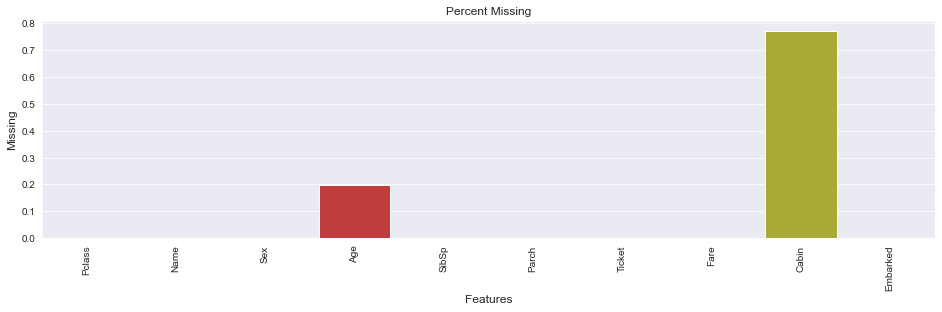

In [4]:
nan_df = (X.isna().sum() / X.shape[0]).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(16,4))
sns.barplot(nan_df['feature'], nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

80.0

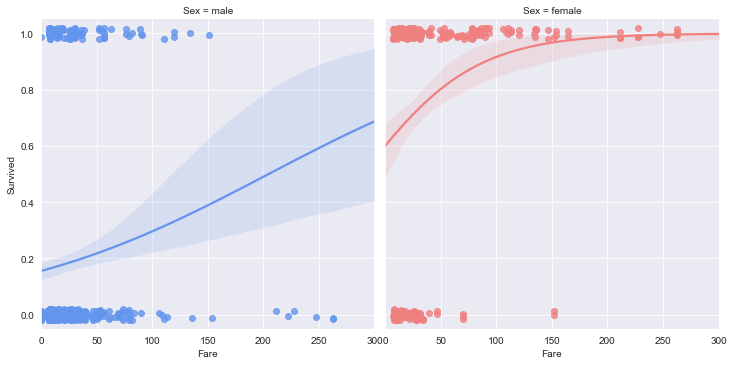

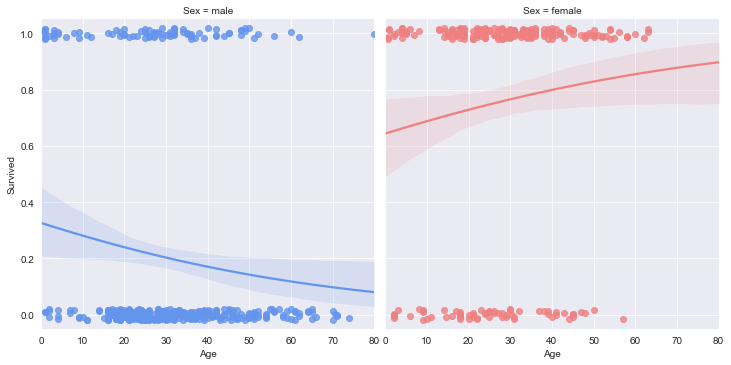

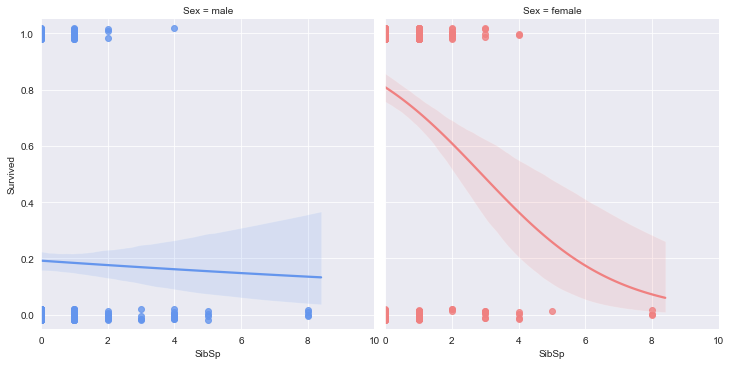

In [5]:
pal = dict(male="#6495ED", female="#F08080")

g = sns.lmplot(x="Fare", y="Survived", col="Sex", hue="Sex", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 300), ylim=(-.05, 1.05))

g2 = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g2.set(xlim=(0, 80), ylim=(-.05, 1.05))

g2 = sns.lmplot(x="SibSp", y="Survived", col="Sex", hue="Sex", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g2.set(xlim=(0, 10), ylim=(-.05, 1.05))
g2.savefig('Rodnie.png')


X['Age'].max()


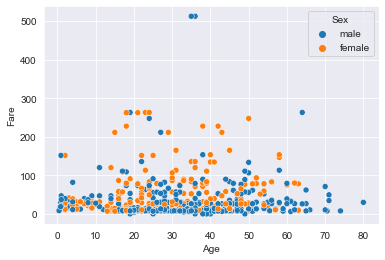

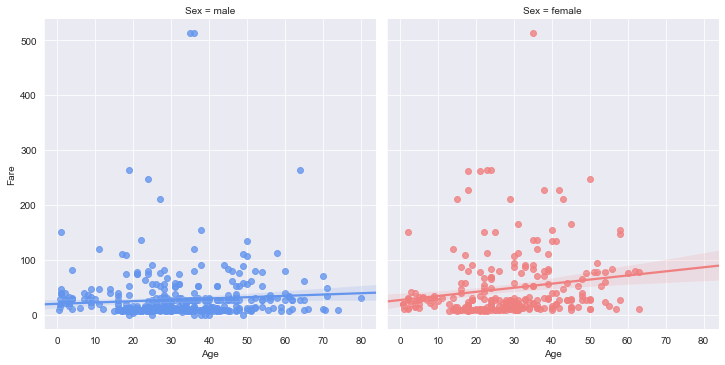

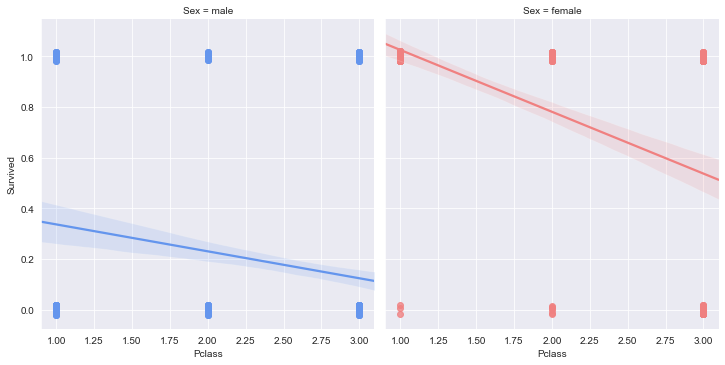

In [6]:

g3 = sns.scatterplot(x="Age", y="Fare",
             hue="Sex",
             data=df,)
g3.figure.savefig('Bilti.png', dpi=400)

g4 = sns.lmplot(x="Age", y="Fare", col="Sex", hue="Sex", data=df,
               palette=pal, y_jitter=.02, truncate=False)
g4.savefig('Age-Fare.png', dpi=400)

g5 = sns.lmplot(x="Pclass", y="Survived", col="Sex", hue="Sex", data=df,
               palette=pal, y_jitter=.02, truncate=False)

In [7]:
# 109/577 m 233 /314

female = df.loc[df['Sex'] == 'female']
male = df.loc[df['Sex'] == 'male']
male_surv = round(len(male.loc[male['Survived'] == 1]) / len(male) * 100, 2)
female_surv = round(len(female.loc[female['Survived'] == 1]) / len(female) * 100, 2)
surv = round(len(df.loc[df['Survived'] == 1]) / len(df), 2)
print(f'Overall survived {surv}%\nMen survived     {male_surv}%\nWomen survived   {female_surv}%')



Overall survived 0.38%
Men survived     18.89%
Women survived   74.2%


In [8]:
X['Pclass'].value_counts(), X['SibSp'].value_counts()

(3    491
 1    216
 2    184
 Name: Pclass, dtype: int64,
 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: SibSp, dtype: int64)

In [9]:
#X['Ticket'].sort_values().unique()

In [10]:

class FeaturesImputer():
    """ Заполнение пропусков и обработка выбросов """
    def __init__(self):
        self.medians=None
        self.mode=None
    
    def fit(self, X):
        
        self.medians = X.median()
        self.mode = X.mode()
        
        
    def transform(self, X):
        
        if 'Cabin' in X.columns:
            X.drop('Cabin', axis=1, inplace=True)
        
      
        X['Age'].fillna(X['Age'].mode()[0], inplace=True)
        X['Fare'].fillna(X['Fare'].mode()[0], inplace=True)
        
        return X

In [11]:

class FeaturesGenerator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.kek = None
    
    def fit(self, X):
        self.todo = 'ok'
        
        
    def transform(self, X):
        
        #Categorial features
        
        X = self.pclass_to_cat(X)
        X = self.embarked_to_cat(X)
        X = self.sex_to_cat(X)
        
        return X
        
    
    @staticmethod
    def sex_to_cat(X):
        X['cat_Male'] = 0
        X['cat_Female'] = 0
        X.loc[X['Sex'] == 'male', 'cat_Male'] = 1
        X.loc[X['Sex'] == 'female', 'cat_Female'] = 1
        X['cat_Male'] = X['cat_Male'].fillna(0)
        X['cat_Female'] = X['cat_Female'].fillna(0)
        return X
        
    @staticmethod 
    def pclass_to_cat(X):
        X['cat_Pclass_1'] = 0
        X['cat_Pclass_2'] = 0
        X['cat_Pclass_3'] = 0
        X.loc[X['Pclass'] == 1, 'cat_Pclass_1'] = 1
        X.loc[X['Pclass'] == 2, 'cat_Pclass_2'] = 1
        X.loc[X['Pclass'] == 3, 'cat_Pclass_3'] = 1
        return X
        
    @staticmethod
    def embarked_to_cat(X):
        X['cat_Embarked_Cherbourg'] = 0
        X['cat_Embarked_Queenstown'] = 0
        X['cat_Embarked_Southampton'] = 0
        X.loc[X['Embarked'] == 'C', 'cat_Embarked_Cherbourg'] = 1
        X.loc[X['Embarked'] == 'Q', 'cat_Embarked_Queenstown'] = 1
        X.loc[X['Embarked'] == 'S', 'cat_Embarked_Southampton'] = 1
        
        return X



In [12]:
pomoika = FeaturesImputer()
features = FeaturesGenerator()
pomoika.fit(X)
pomoika.transform(X)
features.transform(X)
pomoika.transform(X_final)
features.transform(X_final)


X_final.isna().sum()

Pclass                      0
Name                        0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Embarked                    0
cat_Pclass_1                0
cat_Pclass_2                0
cat_Pclass_3                0
cat_Embarked_Cherbourg      0
cat_Embarked_Queenstown     0
cat_Embarked_Southampton    0
cat_Male                    0
cat_Female                  0
dtype: int64

In [13]:





X_columns = ['Age', 'SibSp', 'Parch', 'Fare',
       'cat_Male', 'cat_Female', 'cat_Pclass_1',
       'cat_Pclass_2', 'cat_Pclass_3', 'cat_Embarked_Cherbourg',
       'cat_Embarked_Queenstown', 'cat_Embarked_Southampton'  ]


X_train = X[X_columns]

X_final = X_final[X_columns]



In [14]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cat_Pclass_1,cat_Pclass_2,cat_Pclass_3,cat_Embarked_Cherbourg,cat_Embarked_Queenstown,cat_Embarked_Southampton,cat_Male,cat_Female
PassengerId,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,1,1,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0,0,0,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,0,1,0,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,0,0,0,1,1,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0,0,0,0,1,0,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1,0,0,1,0,1


In [15]:
model_rdforest = RandomForestClassifier(n_estimators=4, bootstrap=True, oob_score=True, max_features=0.33)
model_rdforest.fit(X_train, y)
model_rdforest.score(X_train, y)




<ipython-input-15-6f5b252254a2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rdforest.fit(X_train, y)
c:\users\daneeeek\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\daneeeek\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


0.9393939393939394

In [16]:
y_final = model_rdforest.predict_proba(X_final)


y_final = y_final[:,1]

for i in range(len(y_final)):
            if y_final[i] > 0.5: 
                y_final[i] = 1
            elif y_final[i] <= 0.5:
                y_final[i] = 0




idss = np.arange(892,1310)
ggggg = {
    'PassengerId': idss,
    'Survived': y_final
}
submit = pd.DataFrame(ggggg, columns =['PassengerId', 'Survived'])






In [17]:
submit.to_csv('preds.csv', index=False)
submit.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0
